# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

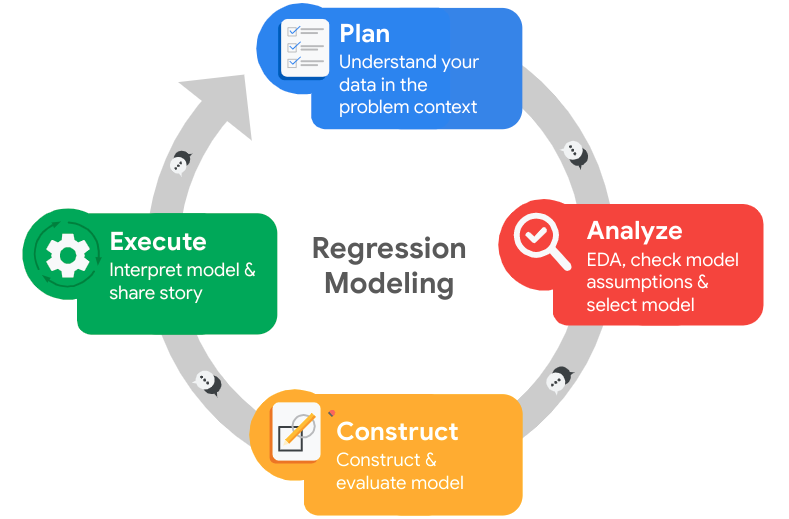



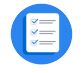

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The leadership team and The  HR department at Salifort.
built a model to predict whether or not an employee at Salifort will leave the company and determine the reasons behind thier departure.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt3
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics




### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [133]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [132]:
# Gather basic information about the data
print(df0.shape)
print(df0.info())
print(df0['left'].value_counts())

(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
0    11428
1     3571
Name: left, dtype: int64


### Gather descriptive statistics about the data

In [134]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
df0.


AttributeError: 'DataFrame' object has no attribute 'column'

In [13]:
# Rename columns as needed
df0.columns = map(str.lower, df0.columns)

# Display all column names after the update

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [14]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [24]:
df0.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


### Check duplicates

Check for any duplicate entries in the data.

In [32]:
# Check for duplicates
df00 = df0[df0.duplicated()]

In [35]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df00

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###


### Check outliers

Check for outliers in the data.

<AxesSubplot:>

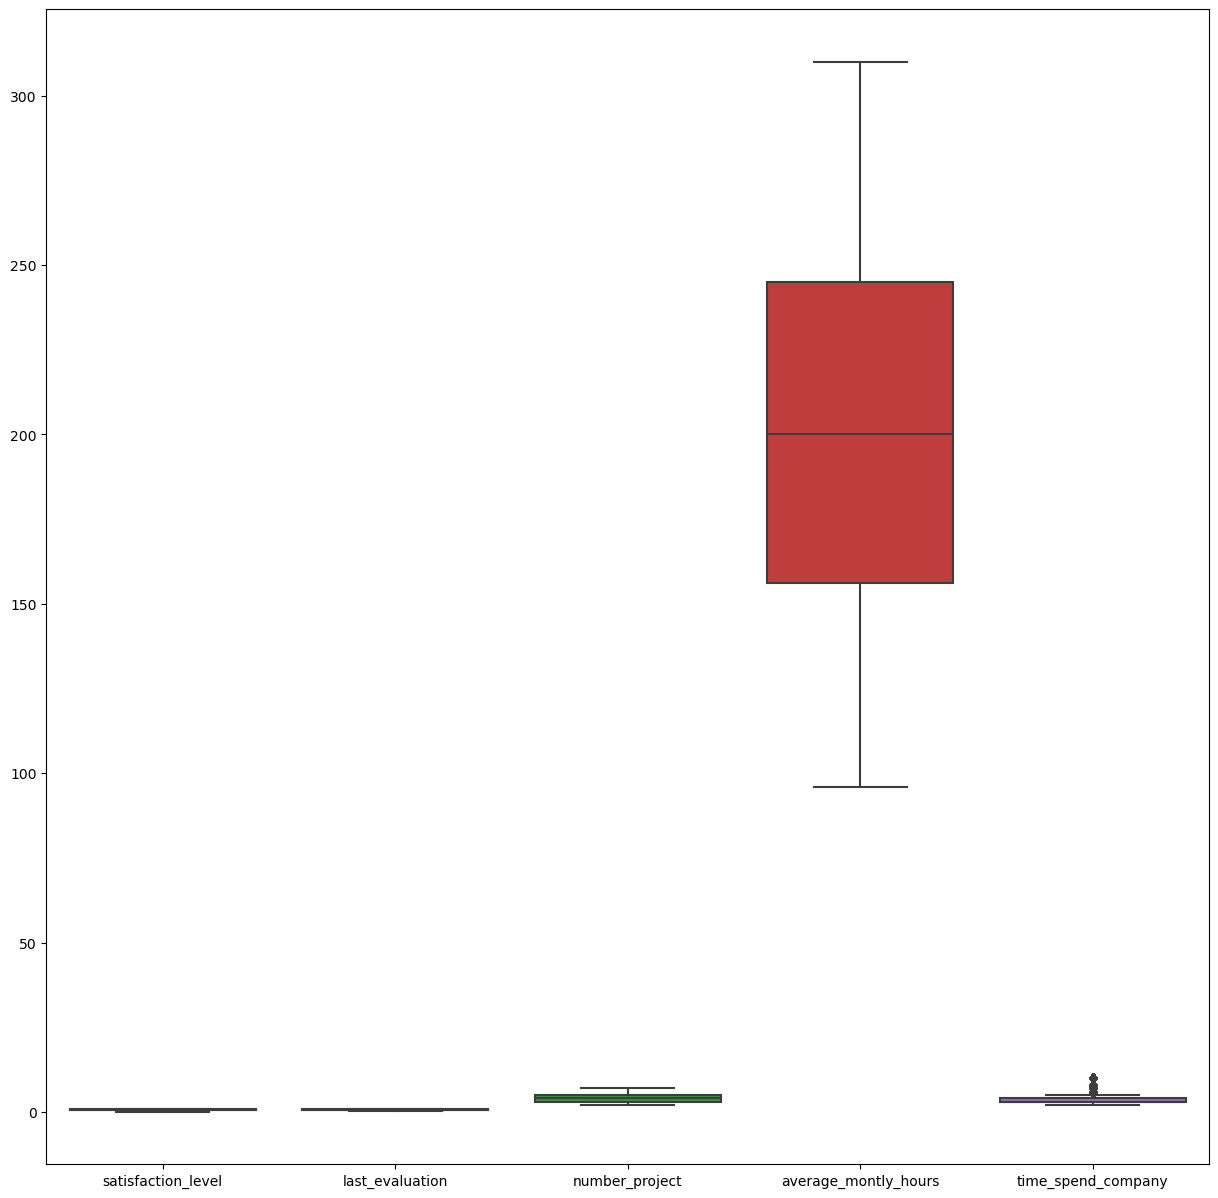

In [44]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig = plt3.figure(figsize=(15,15))
sns.boxplot(data = df0[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company']],showfliers=True)

# there is no outliers that can affect the model.

<AxesSubplot:>

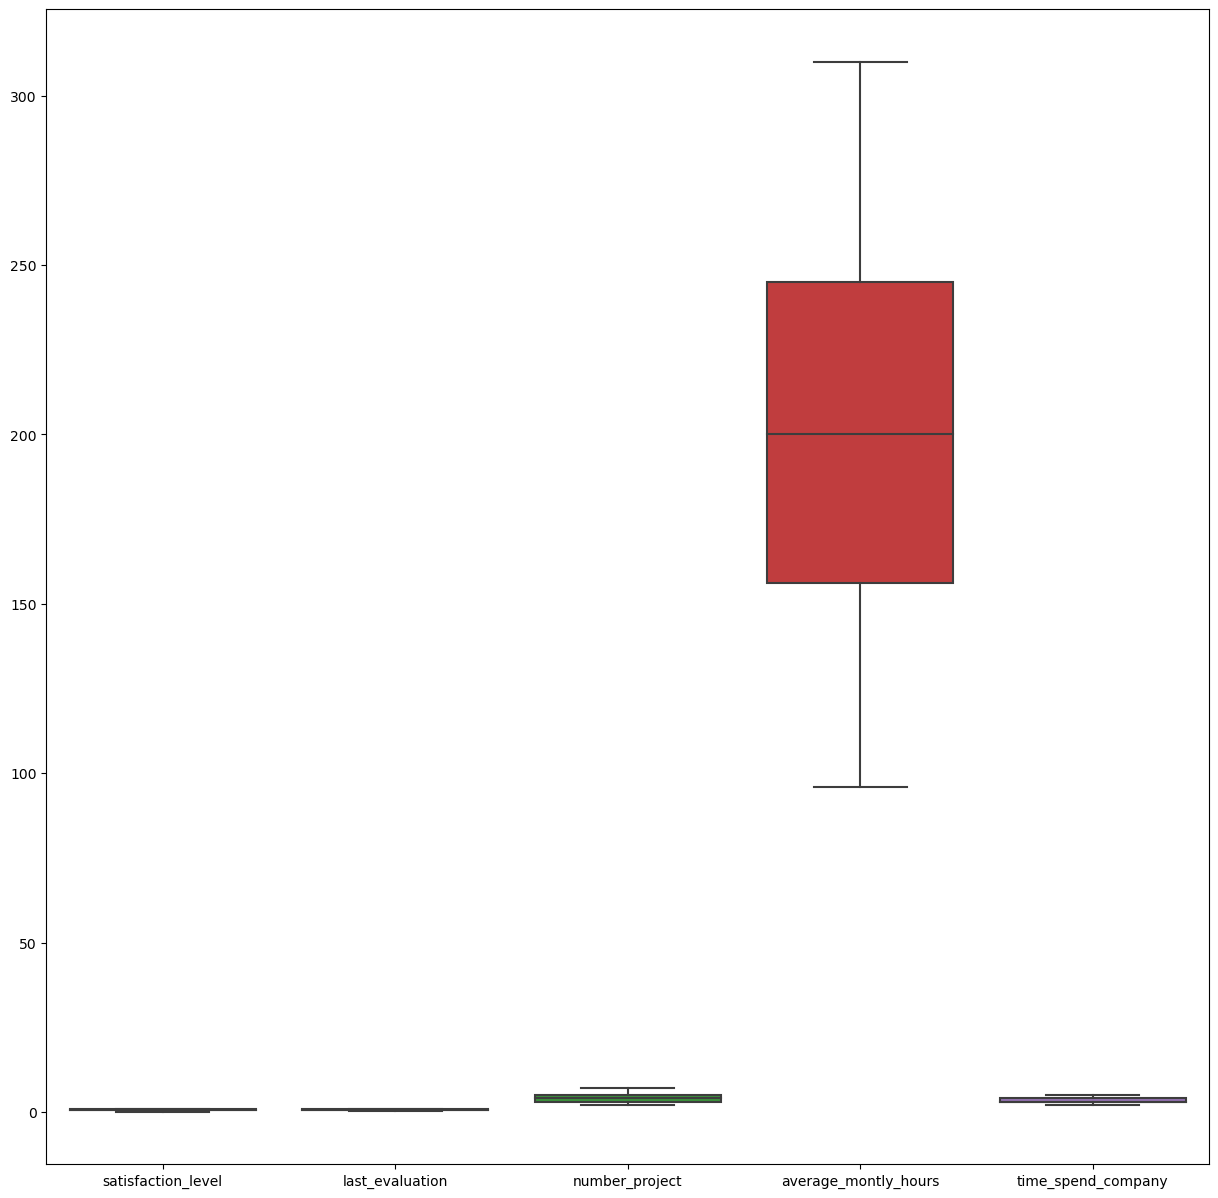

In [60]:
fig = plt3.figure(figsize=(15,15))
sns.boxplot(data = df0[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company']],showfliers=False)

In [ ]:
# Determine the number of rows containing outliers




Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

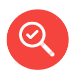
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




there is no outliers in the data as in satisfaction_level and average_montly_hours the distribution is not normal.


## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

<AxesSubplot:title={'center':'Left differentiated by time spend'}, xlabel='(left, time spend)', ylabel='size'>

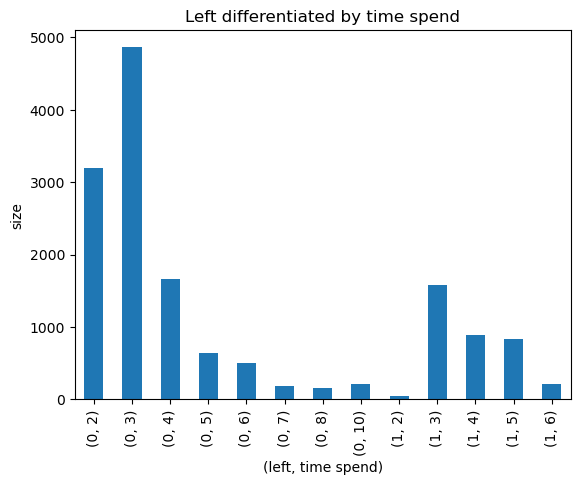

In [57]:
# Create a plot as needed
df0.groupby(by =['left', 'time_spend_company']).size().plot.bar(title = 'Left differentiated by time spend',
                                                               ylabel = 'size',
                                                               xlabel = '(left, time spend)')


<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

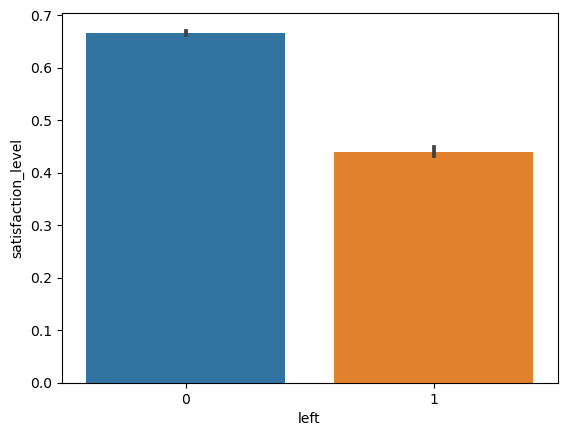

In [58]:
sns.barplot(x = df0['left'], y=df0['satisfaction_level'])

# most of employees that left have a satisfaction level below 0.5

Text(0.5, 1.0, 'Histogram for satisfaction_level')

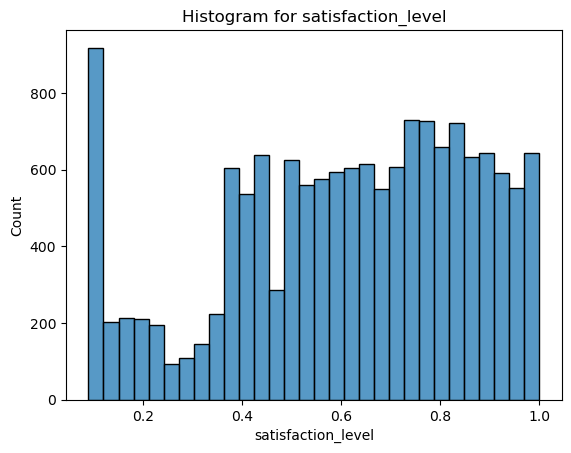

In [59]:
# Create a plot as needed
g = sns.histplot(x =df0['satisfaction_level'])
g.set_title('Histogram for satisfaction_level')
# the  satisfaction_level column distribution is not normal

Text(0.5, 1.0, 'Histogram for average_montly_hours')

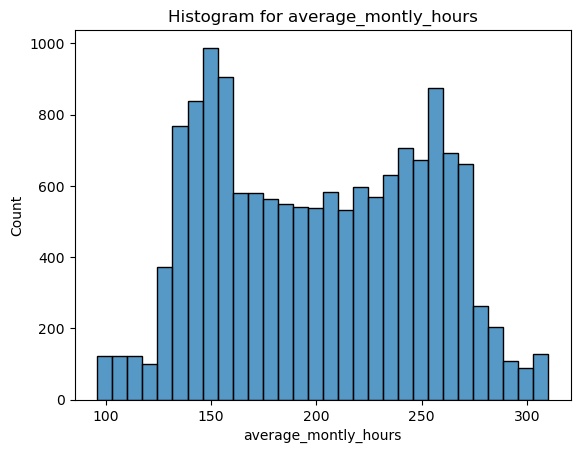

In [61]:
# Create a plot as needed
g = sns.histplot(x =df0['average_montly_hours'])
g.set_title('Histogram for average_montly_hours')


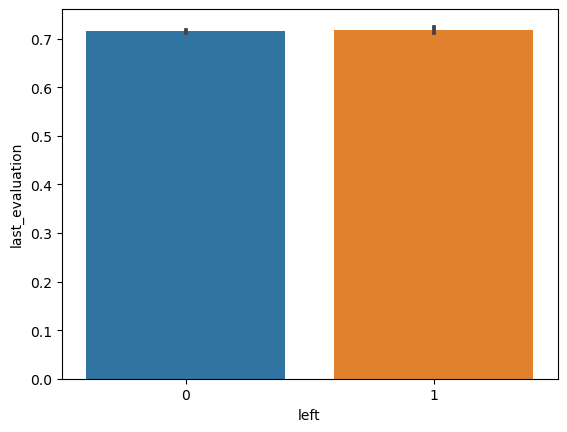

In [140]:
# Create a plot as needed
# create a bar plot for left and last_evaluation
p = sns.barplot(x=df0['left'], y =df0['last_evaluation'])


<AxesSubplot:title={'center':'Left differentiated by number_project'}, xlabel='(left, number_project)', ylabel='size'>

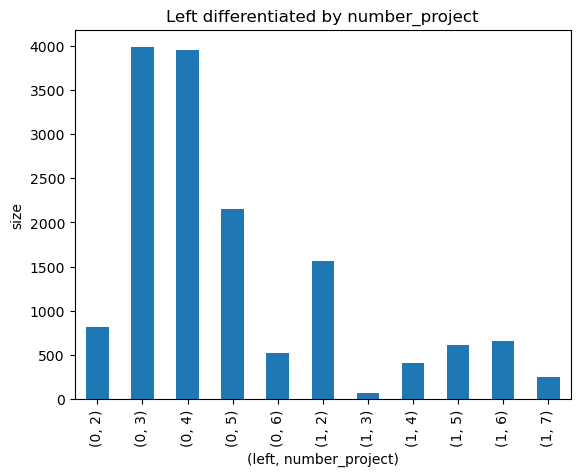

In [65]:
# Create a plot as needed
df0.groupby(by =['left', 'number_project']).size().plot.bar(title = 'Left differentiated by number_project',
                                                               ylabel = 'size',
                                                               xlabel = '(left, number_project)')

# employees which contribute with 2 project or less are more likely to leave.


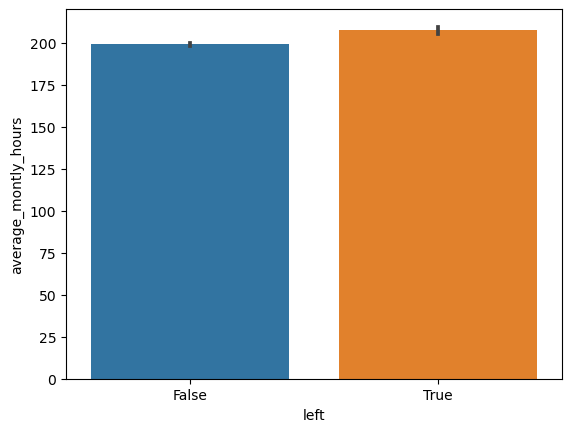

In [77]:
# Create a plot as needed
p = sns.barplot(x=df0['left'], y =df0['average_montly_hours'])
# there is no high correlation beteen left and average_montly_hours however employees who have an average working bigger than 200 most likely to leave.

In [74]:
# Create a plot as needed


left  average_montly_hours
0     96                       6
      97                      14
      98                      23
      99                      11
      100                     19
                              ..
1     306                     18
      307                     14
      308                     20
      309                     16
      310                     18
Length: 356, dtype: int64

<AxesSubplot:title={'center':'Left differentiated by promotion_last_5years'}, xlabel='(left, promotion_last_5years)', ylabel='size'>

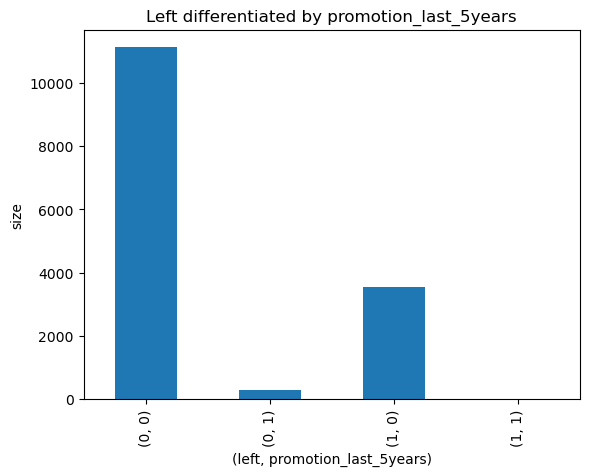

In [135]:
# Create a plot as needed
df0.groupby(by =['left', 'promotion_last_5years']).size().plot.bar(title = 'Left differentiated by promotion_last_5years',
                                                               ylabel = 'size',
                                                               xlabel = '(left, promotion_last_5years)')


<AxesSubplot:title={'center':'Left differentiated by department'}, xlabel='(left, department)', ylabel='size'>

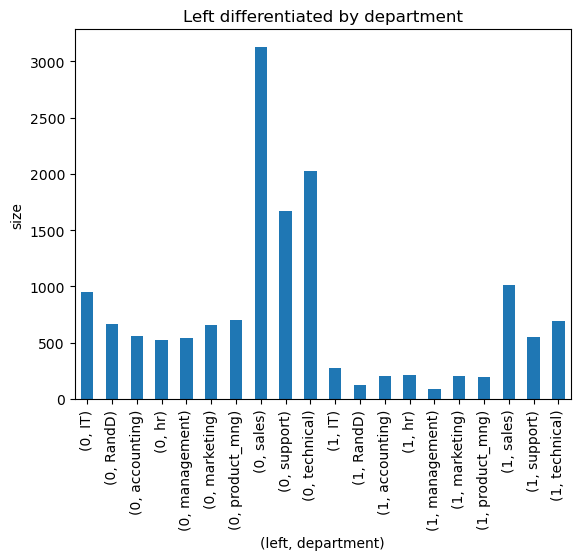

In [88]:
df0.groupby(by =['left', 'department']).size().plot.bar(title = 'Left differentiated by department',
                                                               ylabel = 'size',
                                                               xlabel = '(left, department)')
# employees on sales depatment are more likely to leave than the other departments

<AxesSubplot:title={'center':'Left differentiated by salary'}, xlabel='(left, salary)', ylabel='size'>

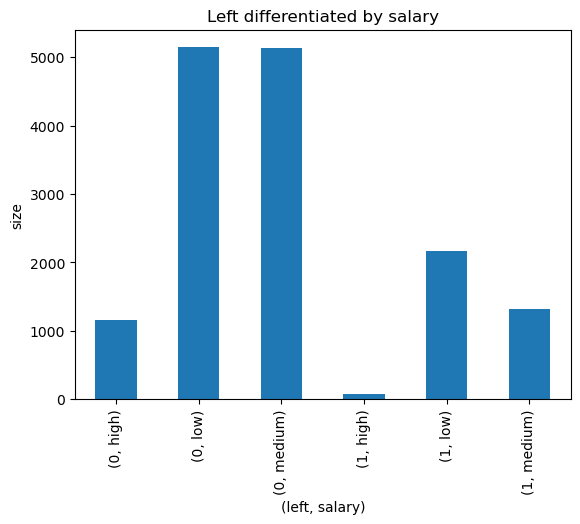

In [114]:
df0.groupby(by =['left', 'salary']).size().plot.bar(title = 'Left differentiated by salary',
                                                               ylabel = 'size',
                                                               xlabel = '(left, salary)')
# most of employees who left are with low and medium salary 

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

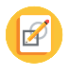
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Type of model: random forest

### Identify the types of models most appropriate for this task.

logistic regression, random forest and XGBoost

### Modeling

Add as many cells as you need to conduct the modeling process.

In [85]:
### YOUR CODE HERE ###
# convert object predictor variables to numerical dummies.

df1 = pd.get_dummies(df0, columns = ['department', 'salary'])

In [94]:
df1.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [96]:
# Separate the data in y and X variables

y = df1['left']

X = df1.drop(columns =['left','last_evaluation'])


In [97]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [99]:
rf = RandomForestClassifier(random_state = 0)

In [103]:
# Determine set of hyperparameters.

cv_prames = {'n_estimators' : [50,100,150],
            'max_depth' : [10,20, 30],
            'min_samples_leaf': [0.2,5,10],
            'min_samples_split' : [5,10],
             'max_samples' : [0.5,0.95],
            'max_features': [7,10,12]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [104]:
rf_cv = GridSearchCV(rf, cv_prames, scoring =scoring, cv =5 , refit = 'f1')

In [105]:
rf_cv.fit(X_train, y_train)

C:\Users\Ortega\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ortega\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ortega\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ortega\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [7, 10, 12],
                         'max_samples': [0.5, 0.95],
                         'min_samples_leaf': [0.2, 5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100, 150]},
             refit='f1', scoring={'precision', 'recall', 'f1', 'accuracy'})

In [106]:
rf_cv.best_params_

{'max_depth': 20,
 'max_features': 10,
 'max_samples': 0.95,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [108]:
y_pred = rf_cv.predict(X_test)

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [113]:
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)
pr_score = metrics.precision_score(y_test,y_pred)
print('precision score:', pr_score)
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9778666666666667
precision score: 0.9851851851851852
recall score: 0.9182968929804373
f1 score: 0.9505658129839191


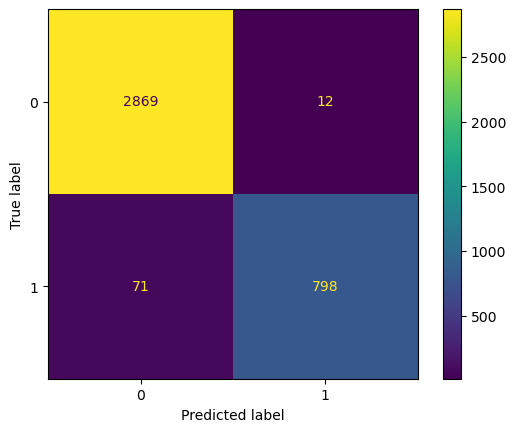

In [116]:
cm = metrics.confusion_matrix(y_test, y_pred)
dis = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

dis.plot()

In [117]:
from sklearn.inspection import permutation_importance

In [130]:
feature_importances = rf_cv.best_estimator_.feature_importances_

In [141]:
col_f = list(X_train.columns)

In [151]:
data = {'col': col_f, 
       'feature_importances': feature_importances}

In [152]:
im_f = pd.DataFrame(data)

In [153]:
im_f.head()

,col,feature_importances
0,satisfaction_level,0.431350
1,number_project,0.183445
2,average_montly_hours,0.152037
3,time_spend_company,0.217471
4,work_accident,0.002815


In [166]:
im_f2 = im_f.sort_values(by='feature_importances', ascending=False)

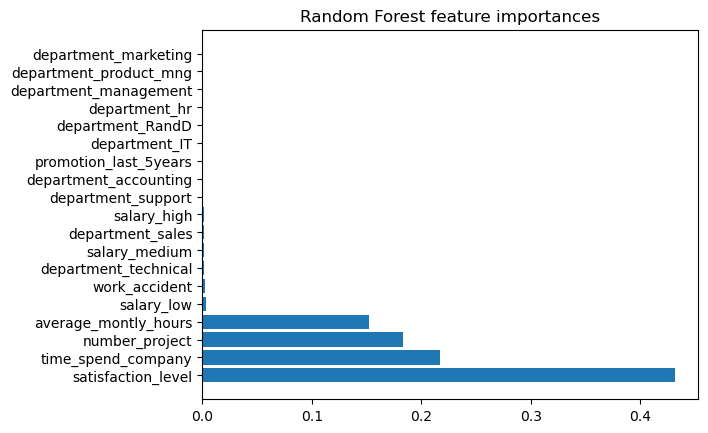

In [176]:

i = plt3.barh(im_f2['col'],im_f2['feature_importances'])
plt3.title('Random Forest feature importances') 
plt3.show()

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



the model evaluation results is high enough, so that the model is usefull to predict with high certinity to drive business decisions.
the HR department can focus in increasing the satisfaction level and to look at promotion for last 5 years to know why there are employess did not recive any promotion in last five years.
consider increase the employee's salary espically with low and medium rates, as to lower the maximnun mounthly hours.



Double-click to enter your responses here.

### Summary of model results
satisfaction_level, number of project,average_montly_hours, promotion_last_5years and salary have a strong relationship with left that we can accurately predict the left employees

after building the model and testing it, the model shows strong correlation with an F1 score of 0.95.     


### Conclusion, Recommendations, Next Steps

The model shows a hight degree of certainty to predict wether any employee will leave.
As a next step, we recommend to construct a  classifaction model to predict the stats for each group for better understanding.